In [1]:
import pandas as pd

In [2]:
# Lectura del DataFrame

df_viajes_ocasionales = pd.read_csv('../data/raw/viajes_ocasionales.csv', sep=';')
df_viajes_ocasionales

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,34.0,106.0,100.0,15.0,26.0,25.0,117.0,146.0,44.0,64.0
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,110.0,139.0,100.0,69.0,169.0,158.0,263.0,132.0,161.0,436.0
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,1064.0,2086.0,1522.0,973.0,1574.0,6450.0,1901.0,1299.0,1144.0,1421.0
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,933.0,1653.0,1569.0,935.0,1485.0,1613.0,2496.0,1403.0,1629.0,2040.0
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,899.0,1069.0,1850.0,749.0,1116.0,1644.0,1772.0,1465.0,1200.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540801,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,...,15.0,25.0,9.0,31.0,8.0,NaN,NaN,NaN,NaN,NaN
540802,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,...,15.0,28.0,39.0,57.0,52.0,NaN,NaN,NaN,NaN,NaN
540803,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,...,64.0,71.0,66.0,109.0,85.0,NaN,NaN,NaN,NaN,NaN
540804,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,...,37.0,21.0,12.0,9.0,28.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Revisar NaNs

nan_por_columna = df_viajes_ocasionales.isnull().sum()
print("NaN por columna:\n", nan_por_columna)

total_nan = df_viajes_ocasionales.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

NaN por columna:
 CUT Comuna Origen              0
Comuna Origen                  0
CUT Provincia Origen           0
Provincia Origen               0
CUT Region Origen              0
Region Origen                  0
CUT Comuna Destino             0
Comuna Destino                 0
Destino Turistico              0
CUT Provincia Destino          0
Provincia Destino              0
CUT Region Destino             0
Region Destino                 0
Anio                           0
enero                     177029
febrero                   175244
marzo                     238731
abril                     274929
mayo                      264414
junio                     269995
julio                     231847
agosto                    295656
septiembre                280511
octubre                   276864
noviembre                 283111
diciembre                 258970
dtype: int64
Total de NaN en el DataFrame: 3027301


In [4]:
# Se Definen columnas a eliminar, con 5 o más NaN se eliminan

def eliminar_filas_nan(df, max_nan=5):
    # Identificamos las filas que tienen más de 5 NaN
    filas_a_eliminar = df[df.isnull().sum(axis=1) > max_nan].index
    # Eliminamos las filas directamente en el DataFrame original
    df.drop(filas_a_eliminar, inplace=True)

# Uso de la función
eliminar_filas_nan(df_viajes_ocasionales)

# Comprobación de NaNs tras tratamiento
nan_por_columna = df_viajes_ocasionales.isnull().sum()
print("NaN por columna:\n", nan_por_columna)

total_nan = df_viajes_ocasionales.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

NaN por columna:
 CUT Comuna Origen             0
Comuna Origen                 0
CUT Provincia Origen          0
Provincia Origen              0
CUT Region Origen             0
Region Origen                 0
CUT Comuna Destino            0
Comuna Destino                0
Destino Turistico             0
CUT Provincia Destino         0
Provincia Destino             0
CUT Region Destino            0
Region Destino                0
Anio                          0
enero                     16181
febrero                   14990
marzo                     34070
abril                     51284
mayo                      44137
junio                     49311
julio                     30108
agosto                    62519
septiembre                56129
octubre                   54244
noviembre                 58997
diciembre                 48971
dtype: int64
Total de NaN en el DataFrame: 520941


In [5]:
df_viajes_ocasionales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261463 entries, 0 to 540804
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CUT Comuna Origen       261463 non-null  int64  
 1   Comuna Origen           261463 non-null  object 
 2   CUT Provincia Origen    261463 non-null  int64  
 3   Provincia Origen        261463 non-null  object 
 4   CUT Region Origen       261463 non-null  int64  
 5   Region Origen           261463 non-null  object 
 6   CUT Comuna Destino      261463 non-null  int64  
 7   Comuna Destino          261463 non-null  object 
 8   Destino Turistico       261463 non-null  object 
 9   CUT Provincia Destino   261463 non-null  int64  
 10  Provincia Destino       261463 non-null  object 
 11  CUT Region Destino      261463 non-null  int64  
 12  Region Destino          261463 non-null  object 
 13  Anio                    261463 non-null  int64  
 14  enero                   2

In [6]:
# Por la naturaleza de los datos, se define reemplazar NaN restantes con la median de cada fila en las columnas de meses

meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

# Filtrar el DataFrame usando la lista de meses
df_mes = df_viajes_ocasionales[meses]

# Aplicar fila por fila la función que cambia los NaN por la mediana de la fila
df_mes = df_mes.apply(lambda row: row.fillna(row.median()), axis=1)

# Reemplazar los valores en el DataFrame original
df_viajes_ocasionales[meses] = df_mes

# Comprobación de NaNs tras tratamiento
nan_por_columna = df_viajes_ocasionales.isnull().sum()
print("NaN por columna:\n", nan_por_columna)

total_nan = df_viajes_ocasionales.isnull().sum().sum()
print("Total de NaN en el DataFrame:", total_nan)

NaN por columna:
 CUT Comuna Origen         0
Comuna Origen             0
CUT Provincia Origen      0
Provincia Origen          0
CUT Region Origen         0
Region Origen             0
CUT Comuna Destino        0
Comuna Destino            0
Destino Turistico         0
CUT Provincia Destino     0
Provincia Destino         0
CUT Region Destino        0
Region Destino            0
Anio                      0
enero                     0
febrero                   0
marzo                     0
abril                     0
mayo                      0
junio                     0
julio                     0
agosto                    0
septiembre                0
octubre                   0
noviembre                 0
diciembre                 0
dtype: int64
Total de NaN en el DataFrame: 0


In [7]:
# Eliminar espacios adicionales en los nombres de columnas

df_viajes_ocasionales.columns = df_viajes_ocasionales.columns.str.strip()

df_viajes_ocasionales

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,34.0,106.0,100.0,15.0,26.0,25.0,117.0,146.0,44.0,64.0
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,110.0,139.0,100.0,69.0,169.0,158.0,263.0,132.0,161.0,436.0
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,1064.0,2086.0,1522.0,973.0,1574.0,6450.0,1901.0,1299.0,1144.0,1421.0
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,933.0,1653.0,1569.0,935.0,1485.0,1613.0,2496.0,1403.0,1629.0,2040.0
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,899.0,1069.0,1850.0,749.0,1116.0,1644.0,1772.0,1465.0,1200.0,1631.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540800,16305,San Nicolás,163,Punilla,16,Ñuble,16202,Cobquecura,Cobquecura,162,...,27.0,37.0,36.0,34.0,33.0,36.0,36.0,36.0,36.0,36.0
540801,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,...,15.0,25.0,9.0,31.0,8.0,16.0,16.0,16.0,16.0,16.0
540802,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,...,15.0,28.0,39.0,57.0,52.0,52.0,52.0,52.0,52.0,52.0
540803,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,...,64.0,71.0,66.0,109.0,85.0,85.0,85.0,85.0,85.0,85.0


In [8]:
# Transformación a int

meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre','diciembre']
for mes in meses:
    df_viajes_ocasionales[mes] = df_viajes_ocasionales[mes].round(0).astype('Int64')

df_viajes_ocasionales.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,...,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,...,34,106,100,15,26,25,117,146,44,64
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,...,110,139,100,69,169,158,263,132,161,436
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,...,1064,2086,1522,973,1574,6450,1901,1299,1144,1421
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,...,933,1653,1569,935,1485,1613,2496,1403,1629,2040
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,...,899,1069,1850,749,1116,1644,1772,1465,1200,1631


In [9]:
# Aplanar viajes ocasionales por mes.
# id_vars -> Lista de columnas que no se van a transformar (se mantendrán como están)
# value_vars -> Lista de columnas que representan los meses. Estas columnas se "aplanarán" en la nueva columna llamada "Mes"

df_viajes_ocasionales = pd.melt(df_viajes_ocasionales, 
                      id_vars=[ 'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen',
                                'Provincia Origen', 'CUT Region Origen', 'Region Origen',
                                'CUT Comuna Destino', 'Comuna Destino', 'Destino Turistico',
                                'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
                                'Region Destino', 'Anio'],
                      value_vars=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 
                                  'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
                      var_name='Mes', 
                      value_name='Viajes Ocasionales')

df_viajes_ocasionales.head()


,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,Mes,Viajes Ocasionales
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,enero,109
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,enero,298
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,enero,2594
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,enero,4138
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,enero,2071


In [10]:
df_viajes_ocasionales.shape

(3137556, 16)

In [11]:
# identificar los meses con números

meses = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

# Crear una columna
df_viajes_ocasionales['CUT Mes'] = df_viajes_ocasionales['Mes'].map(meses)

# Ordenar columnas para que quede CUT Mes a la izq. de Mes
columnas = [
    'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 'Provincia Origen',
    'CUT Region Origen', 'Region Origen', 'CUT Comuna Destino', 'Comuna Destino', 
    'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
    'Region Destino', 'Anio', 'CUT Mes', 'Mes', 'Viajes Ocasionales'
]

df_viajes_ocasionales = df_viajes_ocasionales[columnas]

df_viajes_ocasionales.head()

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071


In [12]:

# Agrupar los viajes por 'Region Destino' y 'Mes'

viajes_por_mes_region = df_viajes_ocasionales.groupby(['Region Destino','CUT Mes','Mes'])['Viajes Ocasionales'].sum().reset_index()

# Crear una columna para indicar si es temporada alta o baja
viajes_por_mes_region['Temporada'] = viajes_por_mes_region.groupby('Region Destino')['Viajes Ocasionales'] \
                                                         .transform(lambda x: ['Alta' if v > x.mean() else 'Baja' for v in x])

viajes_por_mes_region.head()

,Region Destino,CUT Mes,Mes,Viajes Ocasionales,Temporada
0,Antofagasta,1,enero,593679,Alta
1,Antofagasta,2,febrero,537700,Alta
2,Antofagasta,3,marzo,361751,Baja
3,Antofagasta,4,abril,324858,Baja
4,Antofagasta,5,mayo,363401,Baja


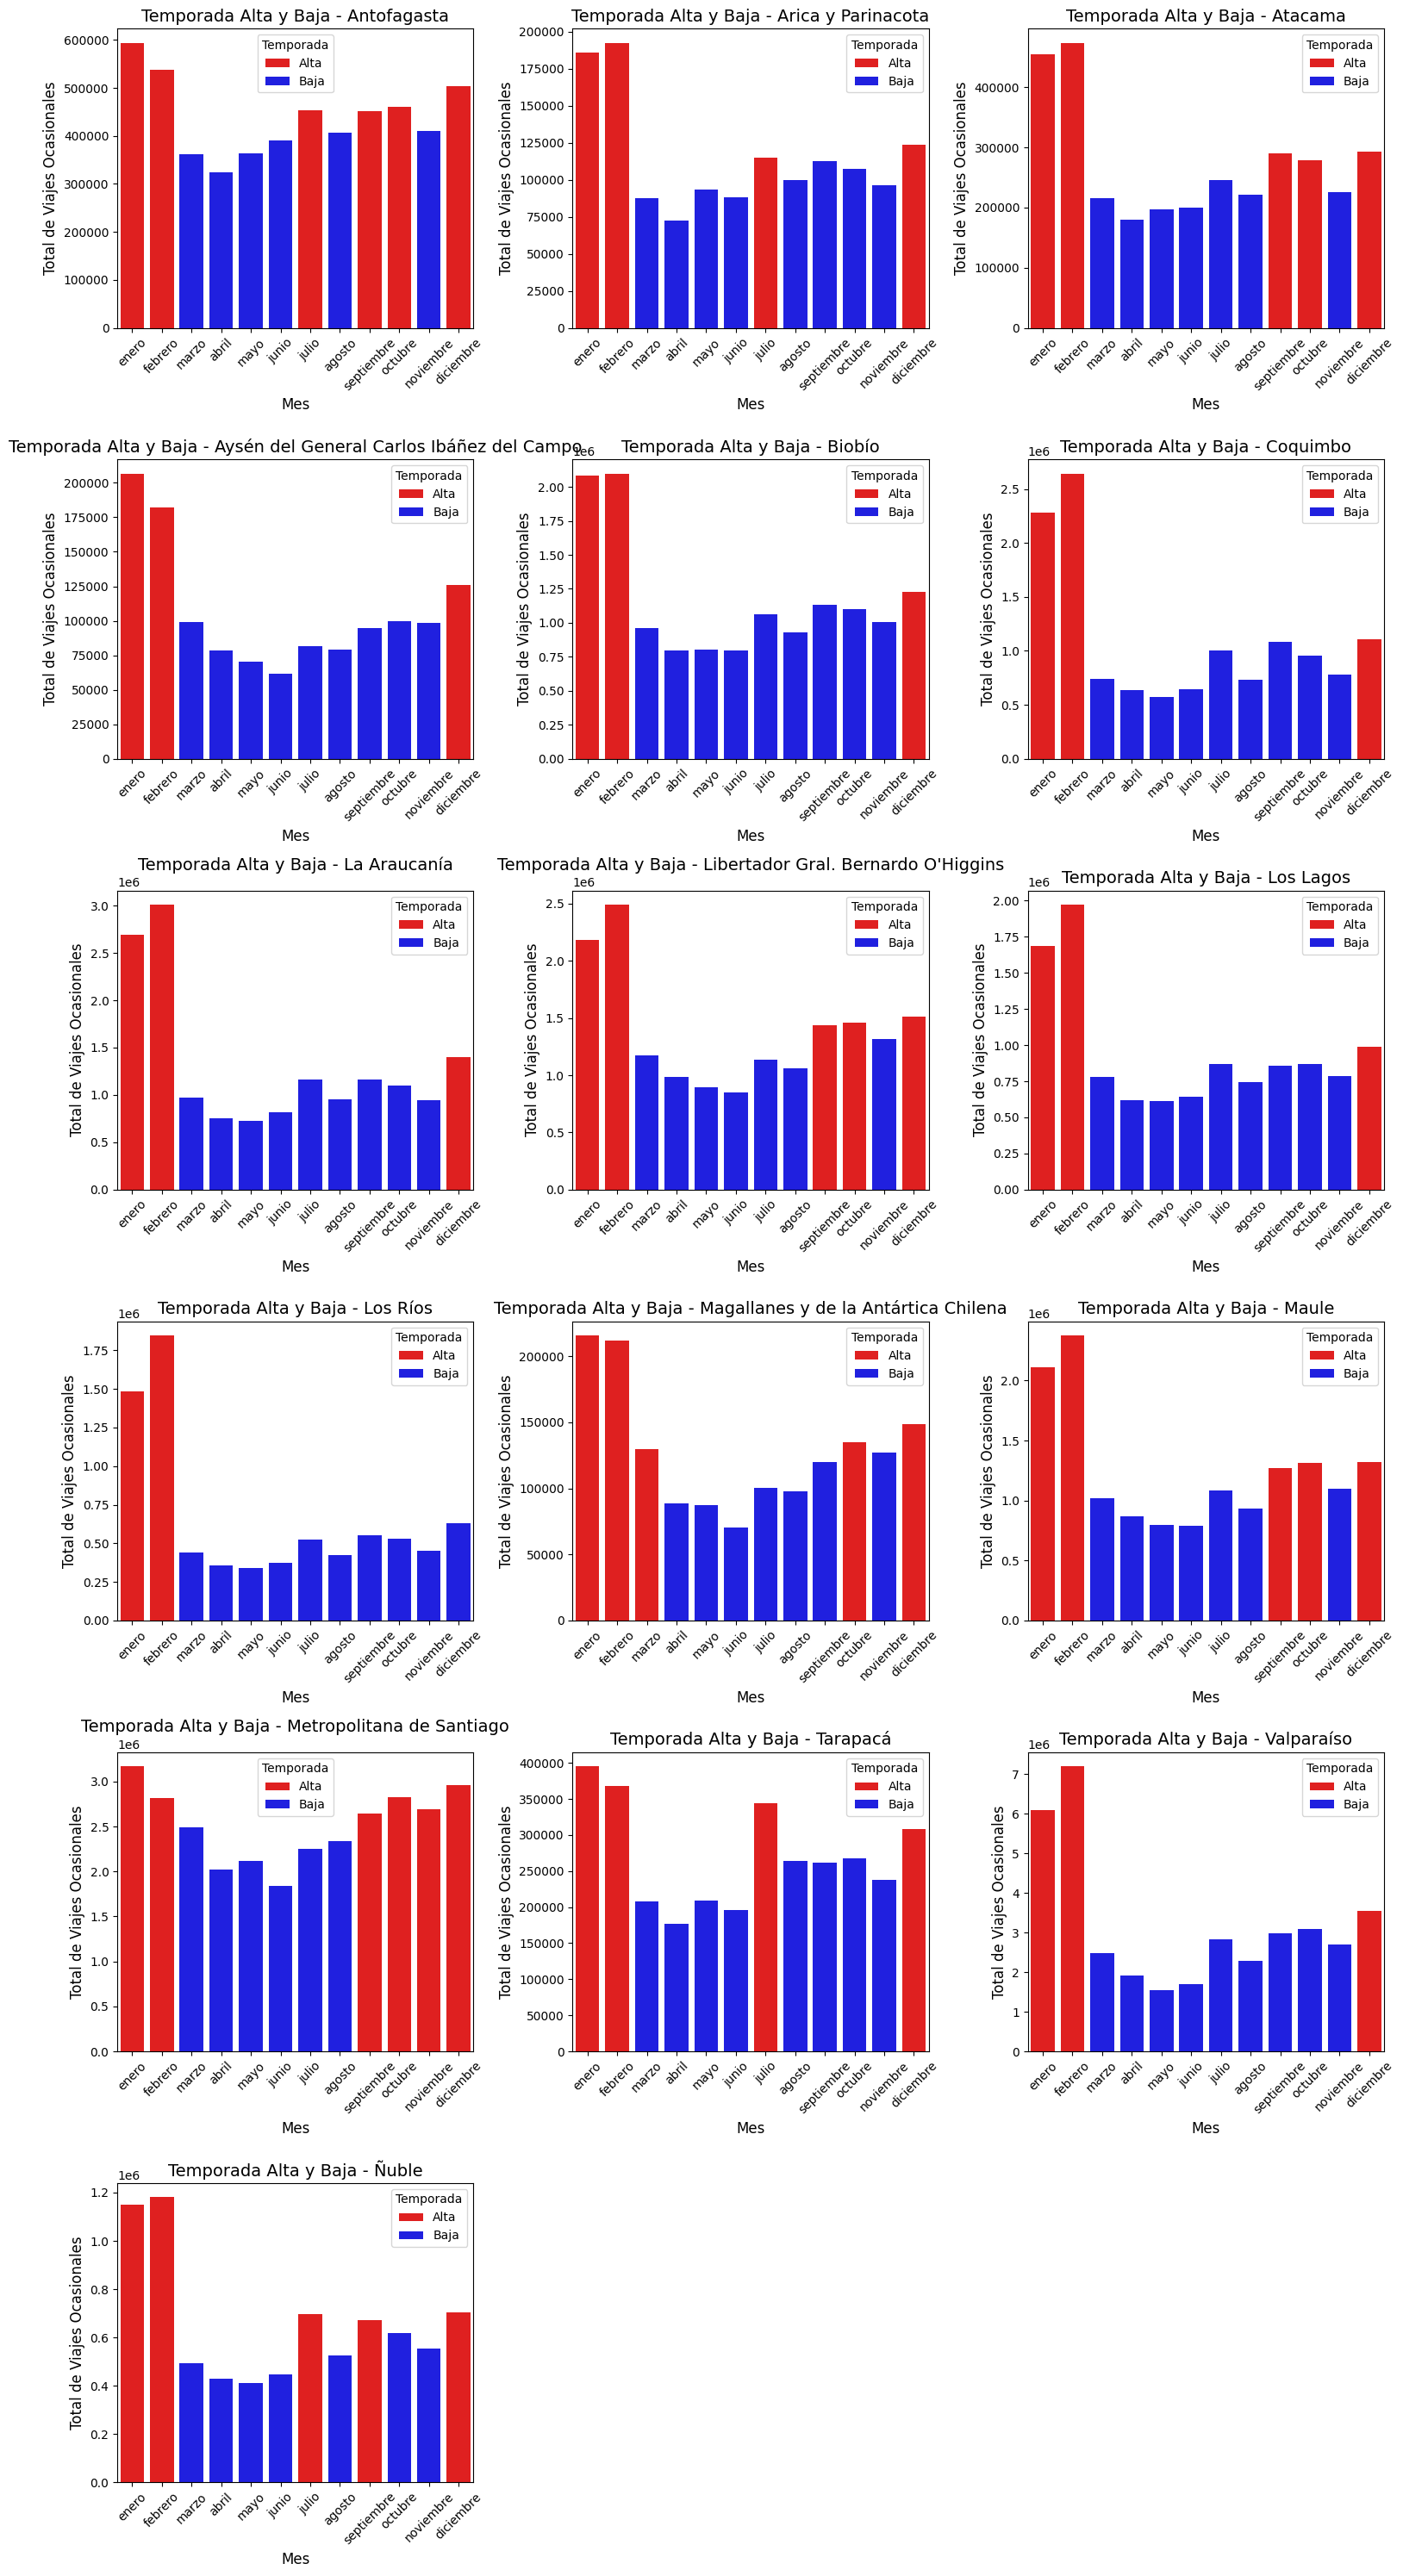

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Visualizar temporadas por región

regiones = viajes_por_mes_region['Region Destino'].unique()

# Calcular el número de filas y columnas necesario para que quede bien las regiones

n_regiones = len(regiones)
n_cols = 3
n_rows = math.ceil(n_regiones / n_cols)  # Calcular el número de filas necesario

plt.figure(figsize=(16, n_rows * 5))  # Ajustar el tamaño de la figura

# Iterar sobre cada región para crear un subplot

for i, region in enumerate(regiones, 1):
    # Crear un subplot para cada región
    plt.subplot(n_rows, n_cols, i)
    
    # Filtrar los datos por región actual

    data_region = viajes_por_mes_region[viajes_por_mes_region['Region Destino'] == region]
    
    # Crear el gráfico por temporada

    sns.barplot(data=data_region, x='Mes', y='Viajes Ocasionales', hue='Temporada', dodge=False,
                palette={'Alta': 'red', 'Baja': 'blue'})
    
    
    plt.title(f'Temporada Alta y Baja - {region}', fontsize=14)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Total de Viajes Ocasionales', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Temporada')

plt.tight_layout()
plt.show()

In [14]:
# Comprobar que estén en el mismo formato

df_viajes_ocasionales['Mes'] = df_viajes_ocasionales['Mes'].astype('category')
viajes_por_mes_region['Mes'] = viajes_por_mes_region['Mes'].astype('category')

# Merge de los Df

df_viajes_ocasionales = df_viajes_ocasionales.merge(
    viajes_por_mes_region[['Region Destino', 'Mes', 'Temporada']],
    on=['Region Destino', 'Mes'],
    how='left'  # 'left' para no perder datos de df_viajes_ocasionales
)

df_viajes_ocasionales


,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,Alta
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,Alta
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,Alta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137551,16305,San Nicolás,163,Punilla,16,Ñuble,16202,Cobquecura,Cobquecura,162,Itata,16,Ñuble,2024,12,diciembre,36,Alta
3137552,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2024,12,diciembre,16,Alta
3137553,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2024,12,diciembre,52,Alta
3137554,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,85,Alta


PIB REGIONAL

In [15]:
# Lectura DataFrame Pib Regional

df_pib_regional = pd.read_csv('../data/raw/pib_regional.csv', sep=';')
df_pib_regional.head()

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana de Santiago,Libertador Gral. Bernardo O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén del General Carlos Ibáñez del Campo,Magallanes y de la Antártica Chilena
0,2013-01-01,278.304651,811.931803,3759.318361,871.758026,1426.567416,3339.833326,16843.137386,1931.429678,1599.502893,634.644423,2301.626148,1172.639779,523.442501,1208.470375,282.046799,387.047791
1,2013-04-01,306.132341,926.814620,3949.000465,845.358870,1413.417680,3371.955157,17862.986368,1708.125163,1610.473179,650.654310,2475.065928,1068.709189,520.977785,1237.106367,272.044536,386.397966
2,2013-07-01,338.475536,1044.963002,3792.362453,867.192979,1341.707470,3190.091221,17184.745420,1504.860461,1285.815102,553.334016,2404.948751,1006.802439,492.418296,1147.297226,265.659402,379.493237
3,2013-10-01,321.351073,1135.992471,4133.677309,975.218096,1436.152081,3438.771257,18822.236849,1694.010822,1467.454453,599.951505,2532.224807,1084.623743,533.889209,1311.711077,279.318343,431.384039
4,2014-01-01,285.116735,977.620431,3803.705319,905.985208,1386.119006,3271.999963,17350.239851,1934.947837,1583.320053,627.795167,2394.915803,1175.242401,543.005670,1279.226153,276.013977,435.493723


In [16]:
# Convertir la columna de Fecha a tipo datetime

df_pib_regional['Fecha'] = pd.to_datetime(df_pib_regional['Fecha'])
df_pib_regional.head()

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana de Santiago,Libertador Gral. Bernardo O'Higgins,Maule,Ñuble,Biobío,La Araucanía,Los Ríos,Los Lagos,Aysén del General Carlos Ibáñez del Campo,Magallanes y de la Antártica Chilena
0,2013-01-01,278.304651,811.931803,3759.318361,871.758026,1426.567416,3339.833326,16843.137386,1931.429678,1599.502893,634.644423,2301.626148,1172.639779,523.442501,1208.470375,282.046799,387.047791
1,2013-04-01,306.132341,926.814620,3949.000465,845.358870,1413.417680,3371.955157,17862.986368,1708.125163,1610.473179,650.654310,2475.065928,1068.709189,520.977785,1237.106367,272.044536,386.397966
2,2013-07-01,338.475536,1044.963002,3792.362453,867.192979,1341.707470,3190.091221,17184.745420,1504.860461,1285.815102,553.334016,2404.948751,1006.802439,492.418296,1147.297226,265.659402,379.493237
3,2013-10-01,321.351073,1135.992471,4133.677309,975.218096,1436.152081,3438.771257,18822.236849,1694.010822,1467.454453,599.951505,2532.224807,1084.623743,533.889209,1311.711077,279.318343,431.384039
4,2014-01-01,285.116735,977.620431,3803.705319,905.985208,1386.119006,3271.999963,17350.239851,1934.947837,1583.320053,627.795167,2394.915803,1175.242401,543.005670,1279.226153,276.013977,435.493723


In [17]:
# Aplanar el DataFrame de PIB
df_pib_regional= pd.melt(df_pib_regional, id_vars=['Fecha'], var_name='Region', value_name='PIB')
df_pib_regional

,Fecha,Region,PIB
0,2013-01-01,Arica y Parinacota,278.304651
1,2013-04-01,Arica y Parinacota,306.132341
2,2013-07-01,Arica y Parinacota,338.475536
3,2013-10-01,Arica y Parinacota,321.351073
4,2014-01-01,Arica y Parinacota,285.116735
...,...,...,...
731,2023-04-01,Magallanes y de la Antártica Chilena,468.905582
732,2023-07-01,Magallanes y de la Antártica Chilena,442.940103
733,2023-10-01,Magallanes y de la Antártica Chilena,496.159006
734,2024-01-01,Magallanes y de la Antártica Chilena,498.067054


In [18]:
# Extraer año y mes y guardarlo en columnas separadas

df_pib_regional['Anio'] = df_pib_regional['Fecha'].dt.year
df_pib_regional['Mes'] = df_pib_regional['Fecha'].dt.month
df_pib_regional.head()

,Fecha,Region,PIB,Anio,Mes
0,2013-01-01,Arica y Parinacota,278.304651,2013,1
1,2013-04-01,Arica y Parinacota,306.132341,2013,4
2,2013-07-01,Arica y Parinacota,338.475536,2013,7
3,2013-10-01,Arica y Parinacota,321.351073,2013,10
4,2014-01-01,Arica y Parinacota,285.116735,2014,1


In [19]:
# Convertir de int32 a int64

df_pib_regional['Anio'] = df_pib_regional['Anio'].astype('int64')

In [20]:
# Diccionario de meses

meses_dict = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Reemplazar números de meses con nombres
df_pib_regional['Mes'] = df_pib_regional['Mes'].map(meses_dict)
df_pib_regional.drop

# Mostrar el DataFrame resultante
df_pib_regional

,Fecha,Region,PIB,Anio,Mes
0,2013-01-01,Arica y Parinacota,278.304651,2013,enero
1,2013-04-01,Arica y Parinacota,306.132341,2013,abril
2,2013-07-01,Arica y Parinacota,338.475536,2013,julio
3,2013-10-01,Arica y Parinacota,321.351073,2013,octubre
4,2014-01-01,Arica y Parinacota,285.116735,2014,enero
...,...,...,...,...,...
731,2023-04-01,Magallanes y de la Antártica Chilena,468.905582,2023,abril
732,2023-07-01,Magallanes y de la Antártica Chilena,442.940103,2023,julio
733,2023-10-01,Magallanes y de la Antártica Chilena,496.159006,2023,octubre
734,2024-01-01,Magallanes y de la Antártica Chilena,498.067054,2024,enero


In [21]:
# Eliminar columna 'Fecha'

df_pib_regional.drop('Fecha',axis=1,inplace=True)

# Filtrar 'Anio' mayor o igual 2019
df_pib_regional = df_pib_regional[df_pib_regional['Anio'] >= 2019].reset_index(drop=True)

df_pib_regional

,Region,PIB,Anio,Mes
0,Arica y Parinacota,311.035324,2019,enero
1,Arica y Parinacota,353.191401,2019,abril
2,Arica y Parinacota,363.193090,2019,julio
3,Arica y Parinacota,378.359908,2019,octubre
4,Arica y Parinacota,321.683008,2020,enero
...,...,...,...,...
347,Magallanes y de la Antártica Chilena,468.905582,2023,abril
348,Magallanes y de la Antártica Chilena,442.940103,2023,julio
349,Magallanes y de la Antártica Chilena,496.159006,2023,octubre
350,Magallanes y de la Antártica Chilena,498.067054,2024,enero


In [22]:
# Busqueda en DataFrame pib_regional

def buscar_pib(region, anio, mes):

    # Cambio de los meses, pib_regional trimestral
    
    if mes in ['febrero', 'marzo']:
        mes = 'enero'
    elif mes in ['mayo', 'junio']:
        mes = 'abril'
    elif mes in ['agosto', 'septiembre']:
        mes = 'julio'
    elif mes in ['noviembre', 'diciembre']:
        mes = 'octubre'

    # Filtrar el DataFrame para encontrar la fila correspondiente

    pib_row = df_pib_regional.loc[
        (df_pib_regional['Region'] == region) & 
        (df_pib_regional['Anio'] == anio) & 
        (df_pib_regional['Mes'] == mes)
    ]

    if not pib_row.empty:
        # Devolver el PIB correspondiente
        return pib_row.iloc[0]['PIB']
    
    return None  # Retornar None si no se encuentra

In [23]:
# Crear Fila PIB Region Origen y llenar con la función buscar_pib

df_viajes_ocasionales['PIB Region Origen'] = df_viajes_ocasionales.apply(
    lambda row: buscar_pib(row['Region Origen'], row['Anio'], row['Mes']),
    axis=1)
df_viajes_ocasionales

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,Alta,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,Alta,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,Alta,1061.580205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137551,16305,San Nicolás,163,Punilla,16,Ñuble,16202,Cobquecura,Cobquecura,162,Itata,16,Ñuble,2024,12,diciembre,36,Alta,NaN
3137552,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2024,12,diciembre,16,Alta,NaN
3137553,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2024,12,diciembre,52,Alta,NaN
3137554,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,85,Alta,NaN


In [24]:
# Crear Fila PIB Region Origen y llenar con la función buscar_pib

df_viajes_ocasionales['PIB Region Destino'] = df_viajes_ocasionales.apply(
    lambda row: buscar_pib(row['Region Destino'], row['Anio'], row['Mes']),
    axis=1)
df_viajes_ocasionales

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,Alta,1061.580205,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,Alta,1061.580205,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,Alta,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137551,16305,San Nicolás,163,Punilla,16,Ñuble,16202,Cobquecura,Cobquecura,162,Itata,16,Ñuble,2024,12,diciembre,36,Alta,NaN,NaN
3137552,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2024,12,diciembre,16,Alta,NaN,NaN
3137553,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2024,12,diciembre,52,Alta,NaN,NaN
3137554,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2024,12,diciembre,85,Alta,NaN,NaN


In [25]:
df_viajes_ocasionales.to_csv('../data/raw/2-ExploracionDataframes.csv', sep=';', index=False)